In [1]:
import numpy as np

def convolution2d(image, kernel):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    padding_h = (kernel_h - 1) // 2
    padding_w = (kernel_w - 1) // 2
    padded_image = np.pad(image, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)
    output = np.zeros((image_h, image_w))
    print(output.size)
    for i in range(image_h):
        for j in range(image_w):
            new = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(new * kernel)
    return output

image = np.random.rand(8, 4)
print(image)
kernel = np.random.rand(3, 3)
kernel = np.flipud(np.fliplr(kernel))

convolution2d(image,kernel)

[[0.66012759 0.72742597 0.11642477 0.74504883]
 [0.98071272 0.53595004 0.87791279 0.94042087]
 [0.38676632 0.59399743 0.0381737  0.07928399]
 [0.02270518 0.25740803 0.14920706 0.69874031]
 [0.84654447 0.93204953 0.98766016 0.78921808]
 [0.85902801 0.19119296 0.51814819 0.17368085]
 [0.72452321 0.52897967 0.50203525 0.15098257]
 [0.82001071 0.02401567 0.91811491 0.19047754]]
32


array([[1.68519423, 2.22507168, 2.29535461, 0.97397102],
       [2.30709756, 2.51001201, 2.61095336, 1.81309355],
       [1.56420138, 1.5798536 , 1.90581407, 0.44593342],
       [1.39717392, 1.54992303, 1.88159391, 0.99721176],
       [1.86957883, 3.14285279, 2.93625202, 1.86725609],
       [2.01416967, 2.65977247, 1.65679047, 0.949104  ],
       [1.47940653, 2.71265521, 1.47164872, 0.82223967],
       [1.16201039, 1.9375418 , 1.19043539, 1.03317837]])

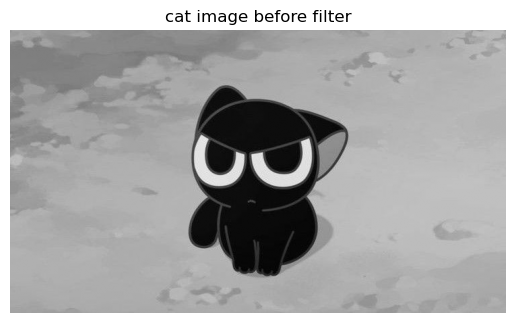

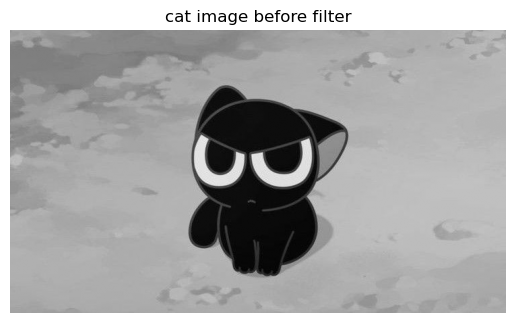

309120
309120
309120
309120
309120


In [2]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("cat1.jpeg",cv2.IMREAD_GRAYSCALE)

plt.imshow(image,cmap='grey')
plt.axis('off') 
plt.title('cat image before filter')
plt.show()
filter1=  (1/9)* np.ones(shape=(3,3))
filter2 = (1/25)* np.ones(shape=(5,5))
filter3 = (1/49)* np.ones(shape=(7,7))
filter4 = np.array([[1, 2,1], [2,4,2], [1,2,1]])
filter4 = 1/16 *filter4
output1 = convolution2d(image,filter1)
output2 = convolution2d(image,filter2)
output3 = convolution2d(image,filter3)


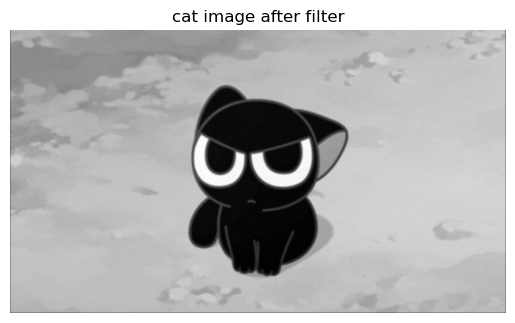

In [3]:
plt.imshow(output1,cmap='grey')
plt.axis('off') 
plt.title('cat image after filter')
plt.show()

309120


309120


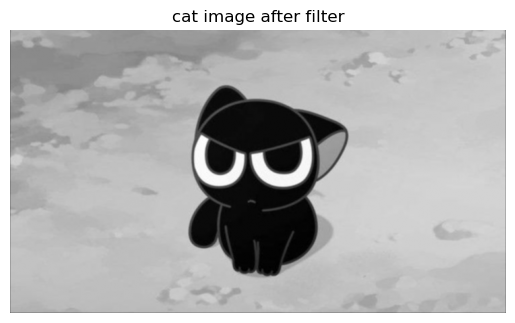

In [4]:
output4 = convolution2d(image,filter4)
plt.imshow(output4,cmap="grey")
plt.axis('off') 
plt.title('cat image after filter')
plt.show()

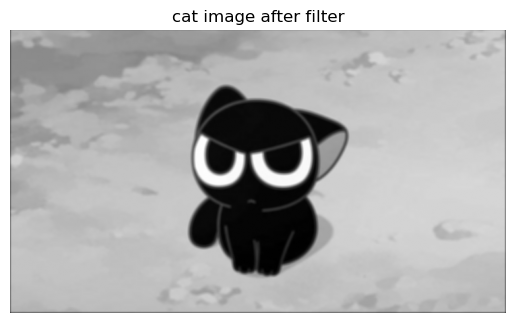

In [5]:
plt.imshow(output2,cmap="grey")
plt.axis('off') 
plt.title('cat image after filter')
plt.show()

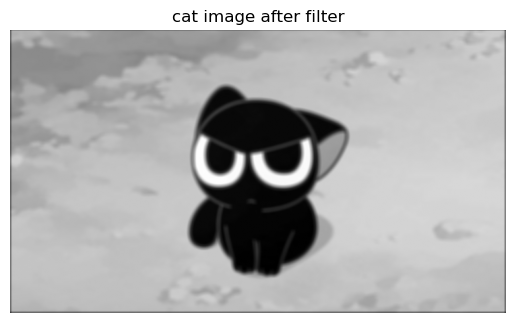

In [6]:
plt.imshow(output3,cmap="grey")
plt.axis('off') 
plt.title('cat image after filter')
plt.show()

In [7]:
def guassian_filter2d(sigma):
   size = int(2 * (np.pi * sigma))
   if size % 2 == 0:
    size += 1
   kernel = np.zeros((size, size))
   for x in range(size):
       for y in range(size):
           kernel[x, y] = (1/(2 * np.pi * sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2) / (2 * sigma**2))
   return kernel

In [8]:
def display_kernel(kernel, winname="Gaussian"):
    kernel_disp = 255 * (kernel - kernel.min()) / (kernel.max() - kernel.min())
    kernel_disp = kernel_disp.astype(np.uint8)
    cv2.imshow(winname, kernel_disp)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [9]:
display_kernel(guassian_filter2d(1), "Gaussian sigma=1")

In [10]:
display_kernel(guassian_filter2d(2), "Gaussian sigma=2")

In [11]:
display_kernel(guassian_filter2d(3), "Gaussian sigma=1")

In [12]:
img = cv2.imread("cat1.jpeg", cv2.IMREAD_GRAYSCALE)
kernel = guassian_filter2d(1.5)

img_out = convolution2d(img, kernel)

cv2.imshow("Original", img)
cv2.imshow("Gaussian Blurred", img_out.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

309120


In [13]:
# sobel filter for horizontal edge detection

sobel_h = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# sobel filter for vertical edge detection
sobel_v = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])


# combine both to see horizontal and vertical edges
#hypot is used to combine the two gradients 
sobel_combined = np.abs(sobel_h) + np.abs(sobel_v)

img = cv2.imread("cube.jpg", cv2.IMREAD_GRAYSCALE)

img_edge1 = convolution2d(img, sobel_h)
img_edge2 = convolution2d(img, sobel_v)
img_edge_combined = convolution2d(img, sobel_combined)

# combined = np.hstack((img_edge1, img_edge2, img_edge_combined))
# cv2.imshow("Edges (Horizontal | Vertical | Combined)", combined)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# using matplotlib
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 3, 1)
# plt.imshow(img_edge1, cmap='gray')
# plt.title("Sobel Horizontal")
# plt.axis("off")

# plt.subplot(1, 3, 2)
# plt.imshow(img_edge2, cmap='gray')
# plt.title("Sobel Vertical")
# plt.axis("off")

# plt.subplot(1, 3, 3)
# plt.imshow(img_edge_combined, cmap='gray')
# plt.title("Sobel Combined")
# plt.axis("off")

# plt.show()

372096
372096
372096
372096
372096


In [ ]:
def normalize_to_uint8(img):
    img = img - img.min()
    if img.max() != 0:
        img = img / img.max()
    return (img * 255).astype(np.uint8)


img = cv2.imread("cube.jpg", cv2.IMREAD_GRAYSCALE)


sobel_h = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_v = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]], dtype=np.float32)


img_edge1 = convolution2d(img, sobel_h)  
img_edge2 = convolution2d(img, sobel_v)  


img_edge_combined = np.sqrt(img_edge1**2 + img_edge2**2)


img_edge1_disp = normalize_to_uint8(img_edge1)
img_edge2_disp = normalize_to_uint8(img_edge2)
img_edge_combined_disp = normalize_to_uint8(img_edge_combined)


combined = np.hstack((img_edge1_disp, img_edge2_disp, img_edge_combined_disp))
cv2.imshow("Edges (Horizontal | Vertical | Combined)", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()



plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_edge1_disp, cmap='gray')
plt.title("Sobel Horizontal")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_edge2_disp, cmap='gray')
plt.title("Sobel Vertical")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_edge_combined_disp, cmap='gray')
plt.title("Sobel Combined")
plt.axis("off")

plt.show()

372096
372096
372096


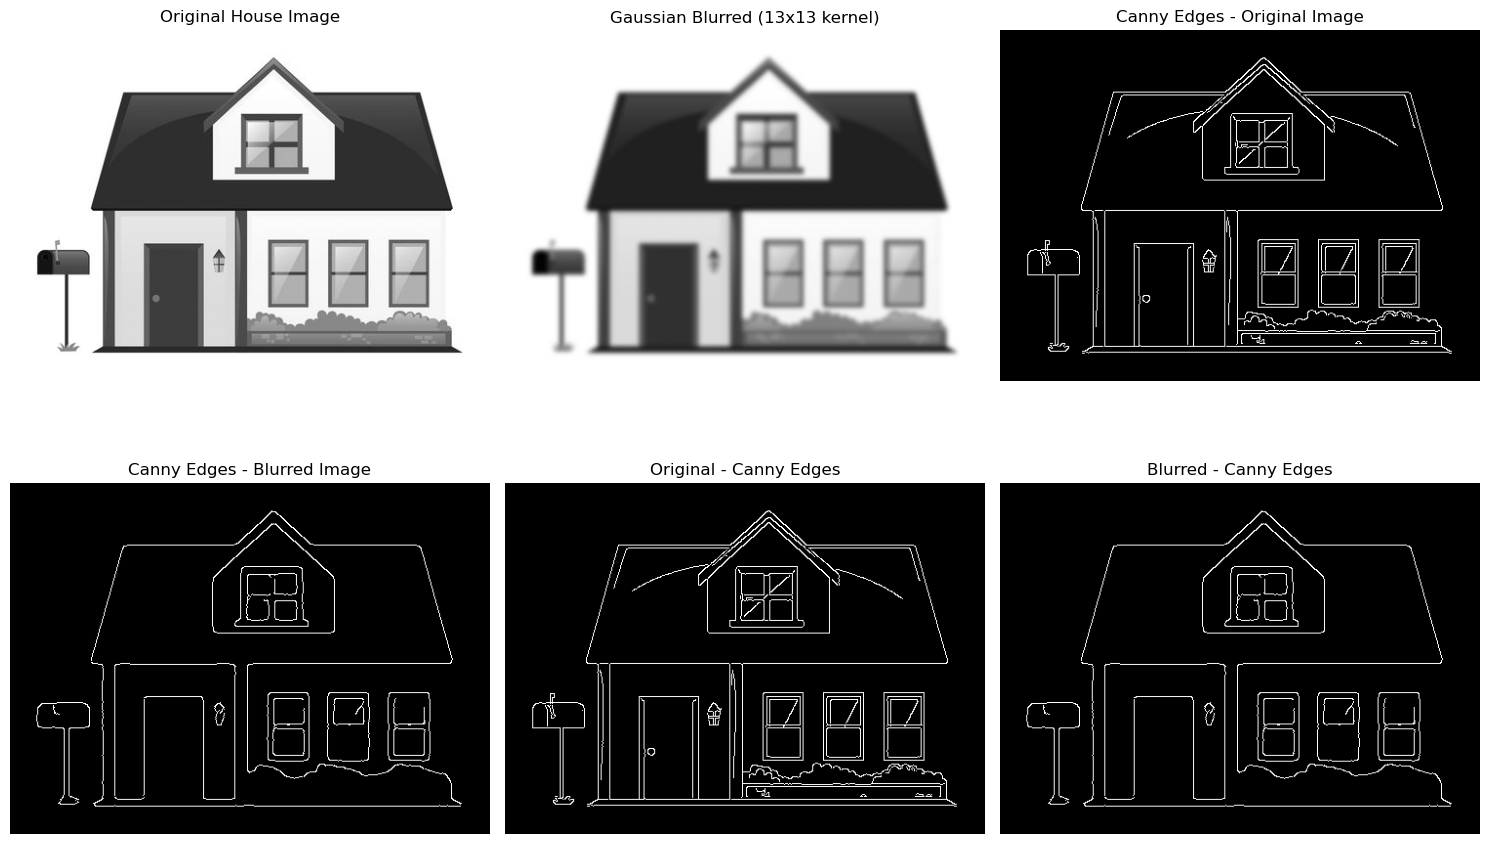

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

house_img = cv2.imread("house.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(15, 10))


# Original image
plt.subplot(2, 3, 1)
plt.imshow(house_img, cmap='gray')
plt.title('Original House Image')
plt.axis('off')

blurred_house = cv2.GaussianBlur(house_img, (13, 13), 0)

plt.subplot(2, 3, 2)
plt.imshow(blurred_house, cmap='gray')
plt.title('Gaussian Blurred (13x13 kernel)')
plt.axis('off')


edges_original = cv2.Canny(house_img, 50, 150)

plt.subplot(2, 3, 3)
plt.imshow(edges_original, cmap='gray')
plt.title('Canny Edges - Original Image')
plt.axis('off')

edges_blurred = cv2.Canny(blurred_house, 50, 150)

plt.subplot(2, 3, 4)
plt.imshow(edges_blurred, cmap='gray')
plt.title('Canny Edges - Blurred Image')
plt.axis('off')
    
plt.subplot(2, 3, 5)
plt.imshow(edges_original, cmap='gray')
plt.title('Original - Canny Edges')
plt.axis('off')
    
plt.subplot(2, 3, 6)
plt.imshow(edges_blurred, cmap='gray')
plt.title('Blurred - Canny Edges')
plt.axis('off')
    
plt.tight_layout()
plt.show()
    
    

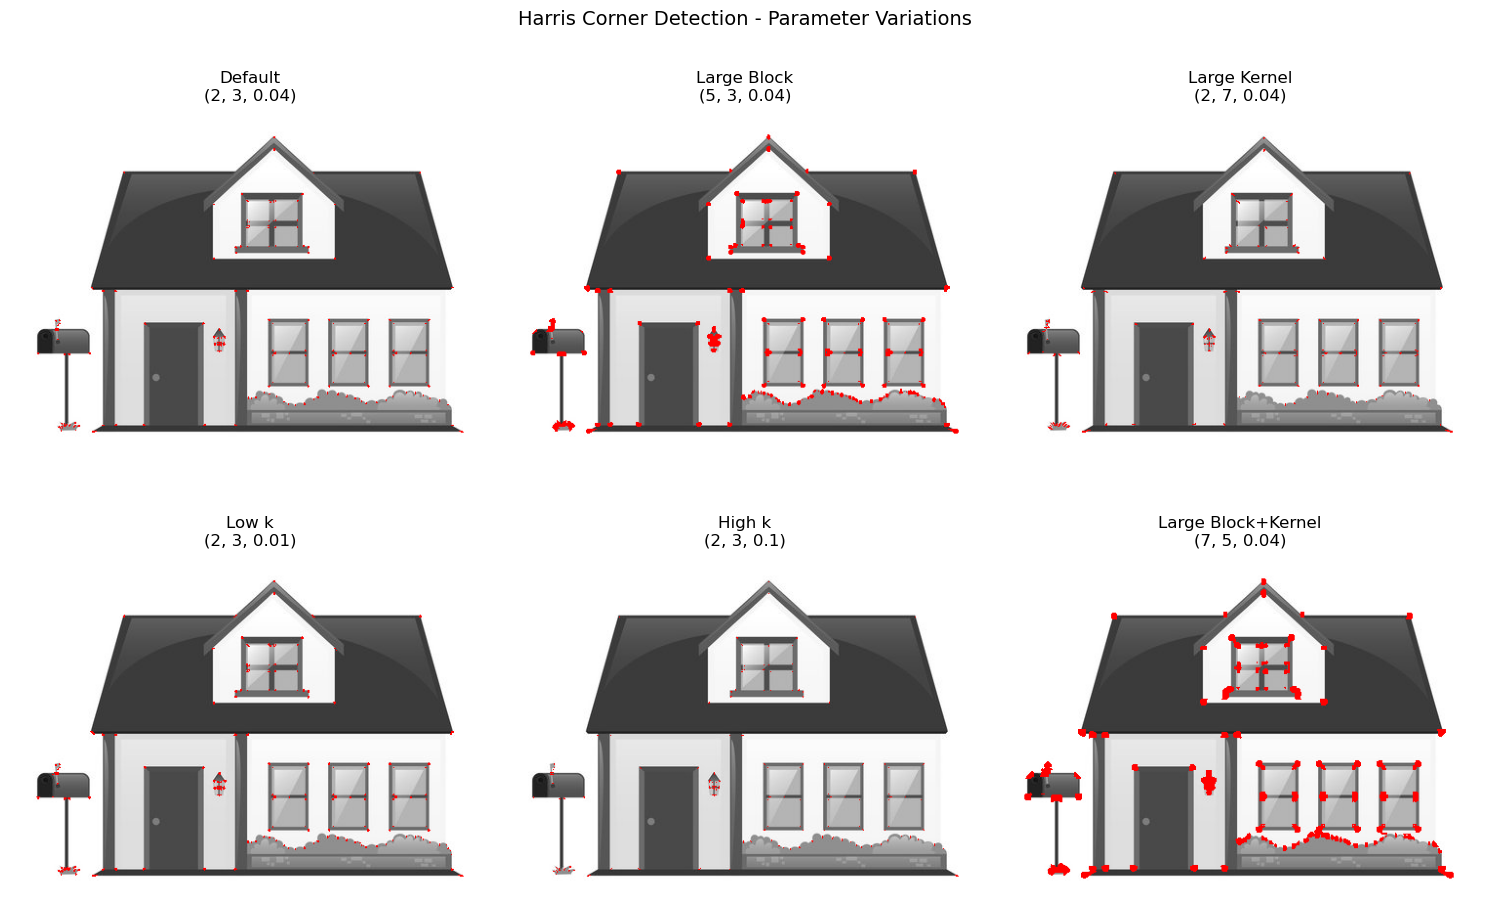